# U.S. Accident

## The Project

This project intends to study U.S. accidents dataset found on Kaggle, click [here](https://www.kaggle.com/sobhanmoosavi/us-accidents).  The scope of this project will be to analize the amount of accidents per state and counties with the most accidents.  This part of the project will be for the data wrangling and exploratory data analysis,  a second part will be dedicated for the machine learning to create an algorithm that will predict the amount of accidents for the first quarter of 2021, click [here](us_accidents_machine_learning.ipynb).

## Main Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

## Data Wrangling & Exploratory Data Analysis

The first step will be to load the dataset and investigate it.

In [3]:
df = pd.read_csv("us_accidents/US_Accidents_Dec20.csv") # Loading the dataset

In [4]:
df.head() # Checking the first entries to the dataset

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
df.columns # Checking the columns names.

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

My first impression of the dataset is that it has many features that will not be necessary for this project.  The project will be to create a timeseries machine learning algorithm that will seek to predict the amount of accidents happening in the near future.  The time series will utilize a total daily number of accidents, which means that any feature that indicates time of day, such as 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', etc, will not be taken into consideration.  Features that indicates precise location of the accidents, such as Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', etc, will also be eliminated.  I thought about derivind the duration of each accidents by subtracting the 'Start_Time' to the 'End_Time', but I believe that the 'Severity' feature is a better feature since the duration may depend on other unexplained factors.

In short, from this dataset I plan to make use of the 'Start_Time' and 'State' features.  The 'Start_Time' will be changed to 'Date' because it will be the only datetime data type and it indicates when the accident happened.  A new column named 'Count' will be created that will assist in the count of the accidents per day.

In [6]:
df = df[['Start_Time', 'State', 'County']] # Isolating the features to be used.
df['Count'] = 1 # Creating the Count to help count the amount of daily accidents.

In [7]:
df.head()

,Start_Time,State,County,Count
0,2016-02-08 05:46:00,OH,Montgomery,1
1,2016-02-08 06:07:59,OH,Franklin,1
2,2016-02-08 06:49:27,OH,Clermont,1
3,2016-02-08 07:23:34,OH,Montgomery,1
4,2016-02-08 07:39:07,OH,Montgomery,1


In [8]:
# Checking the data type of the new dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4232541 entries, 0 to 4232540
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Start_Time  object
 1   State       object
 2   County      object
 3   Count       int64 
dtypes: int64(1), object(3)
memory usage: 129.2+ MB


There seems to be only one issue with the dataset.  The 'Start_Time' column has an object data type.  I will now change it to datetime and while I'm at it and change the column name to 'Date' to make it simpler.  I will also check for missing data.

In [9]:
df.Start_Time = pd.to_datetime(df.Start_Time) # Changing the data type of the 'Start_Time column'
df.rename(columns = {'Start_Time':'Date'}, inplace = True) # Changing the column name to 'Date'

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4232541 entries, 0 to 4232540
Data columns (total 4 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Date    datetime64[ns]
 1   State   object        
 2   County  object        
 3   Count   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 129.2+ MB


In [11]:
df.isna().sum() # Checking for missing data

Date      0
State     0
County    0
Count     0
dtype: int64

Great!  No missing data either!  Now I will create new dataframes isolating the information for each study, by state and county.

In [12]:
state = df[['Date', 'State', 'Count']] # Creating the state dataframe
state = state.sort_values('Date')
state.set_index('Date', inplace = True) # Setting the 'Date' column as the index

In [13]:
state.head()

,State,Count
Date,,
2016-02-08 00:37:08,OH,1
2016-02-08 05:46:00,OH,1
2016-02-08 05:56:20,OH,1
2016-02-08 06:07:59,OH,1
2016-02-08 06:15:39,OH,1


In [14]:
state.tail()

,State,Count
Date,,
2020-12-31 22:50:29,UT,1
2020-12-31 22:51:32,OR,1
2020-12-31 22:51:32,OR,1
2020-12-31 22:57:02,IL,1
2020-12-31 23:28:56,OR,1


In [15]:
state = state.pivot_table(values = 'Count', columns = 'State', index = state.index) # Setting the states as columns
state = state.resample('D').sum().astype(np.int) # Setting the values to integer instead of floats and daily frequency

In [16]:
state.head()

State,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Date,,,,,,,,,,,,,,,,,,,,,
2016-02-08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-02-09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2016-02-10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
2016-02-11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,0
2016-02-12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
from tqdm import tqdm

The first few days seems to be empty for most states.  Let me plot some of the states shown above.

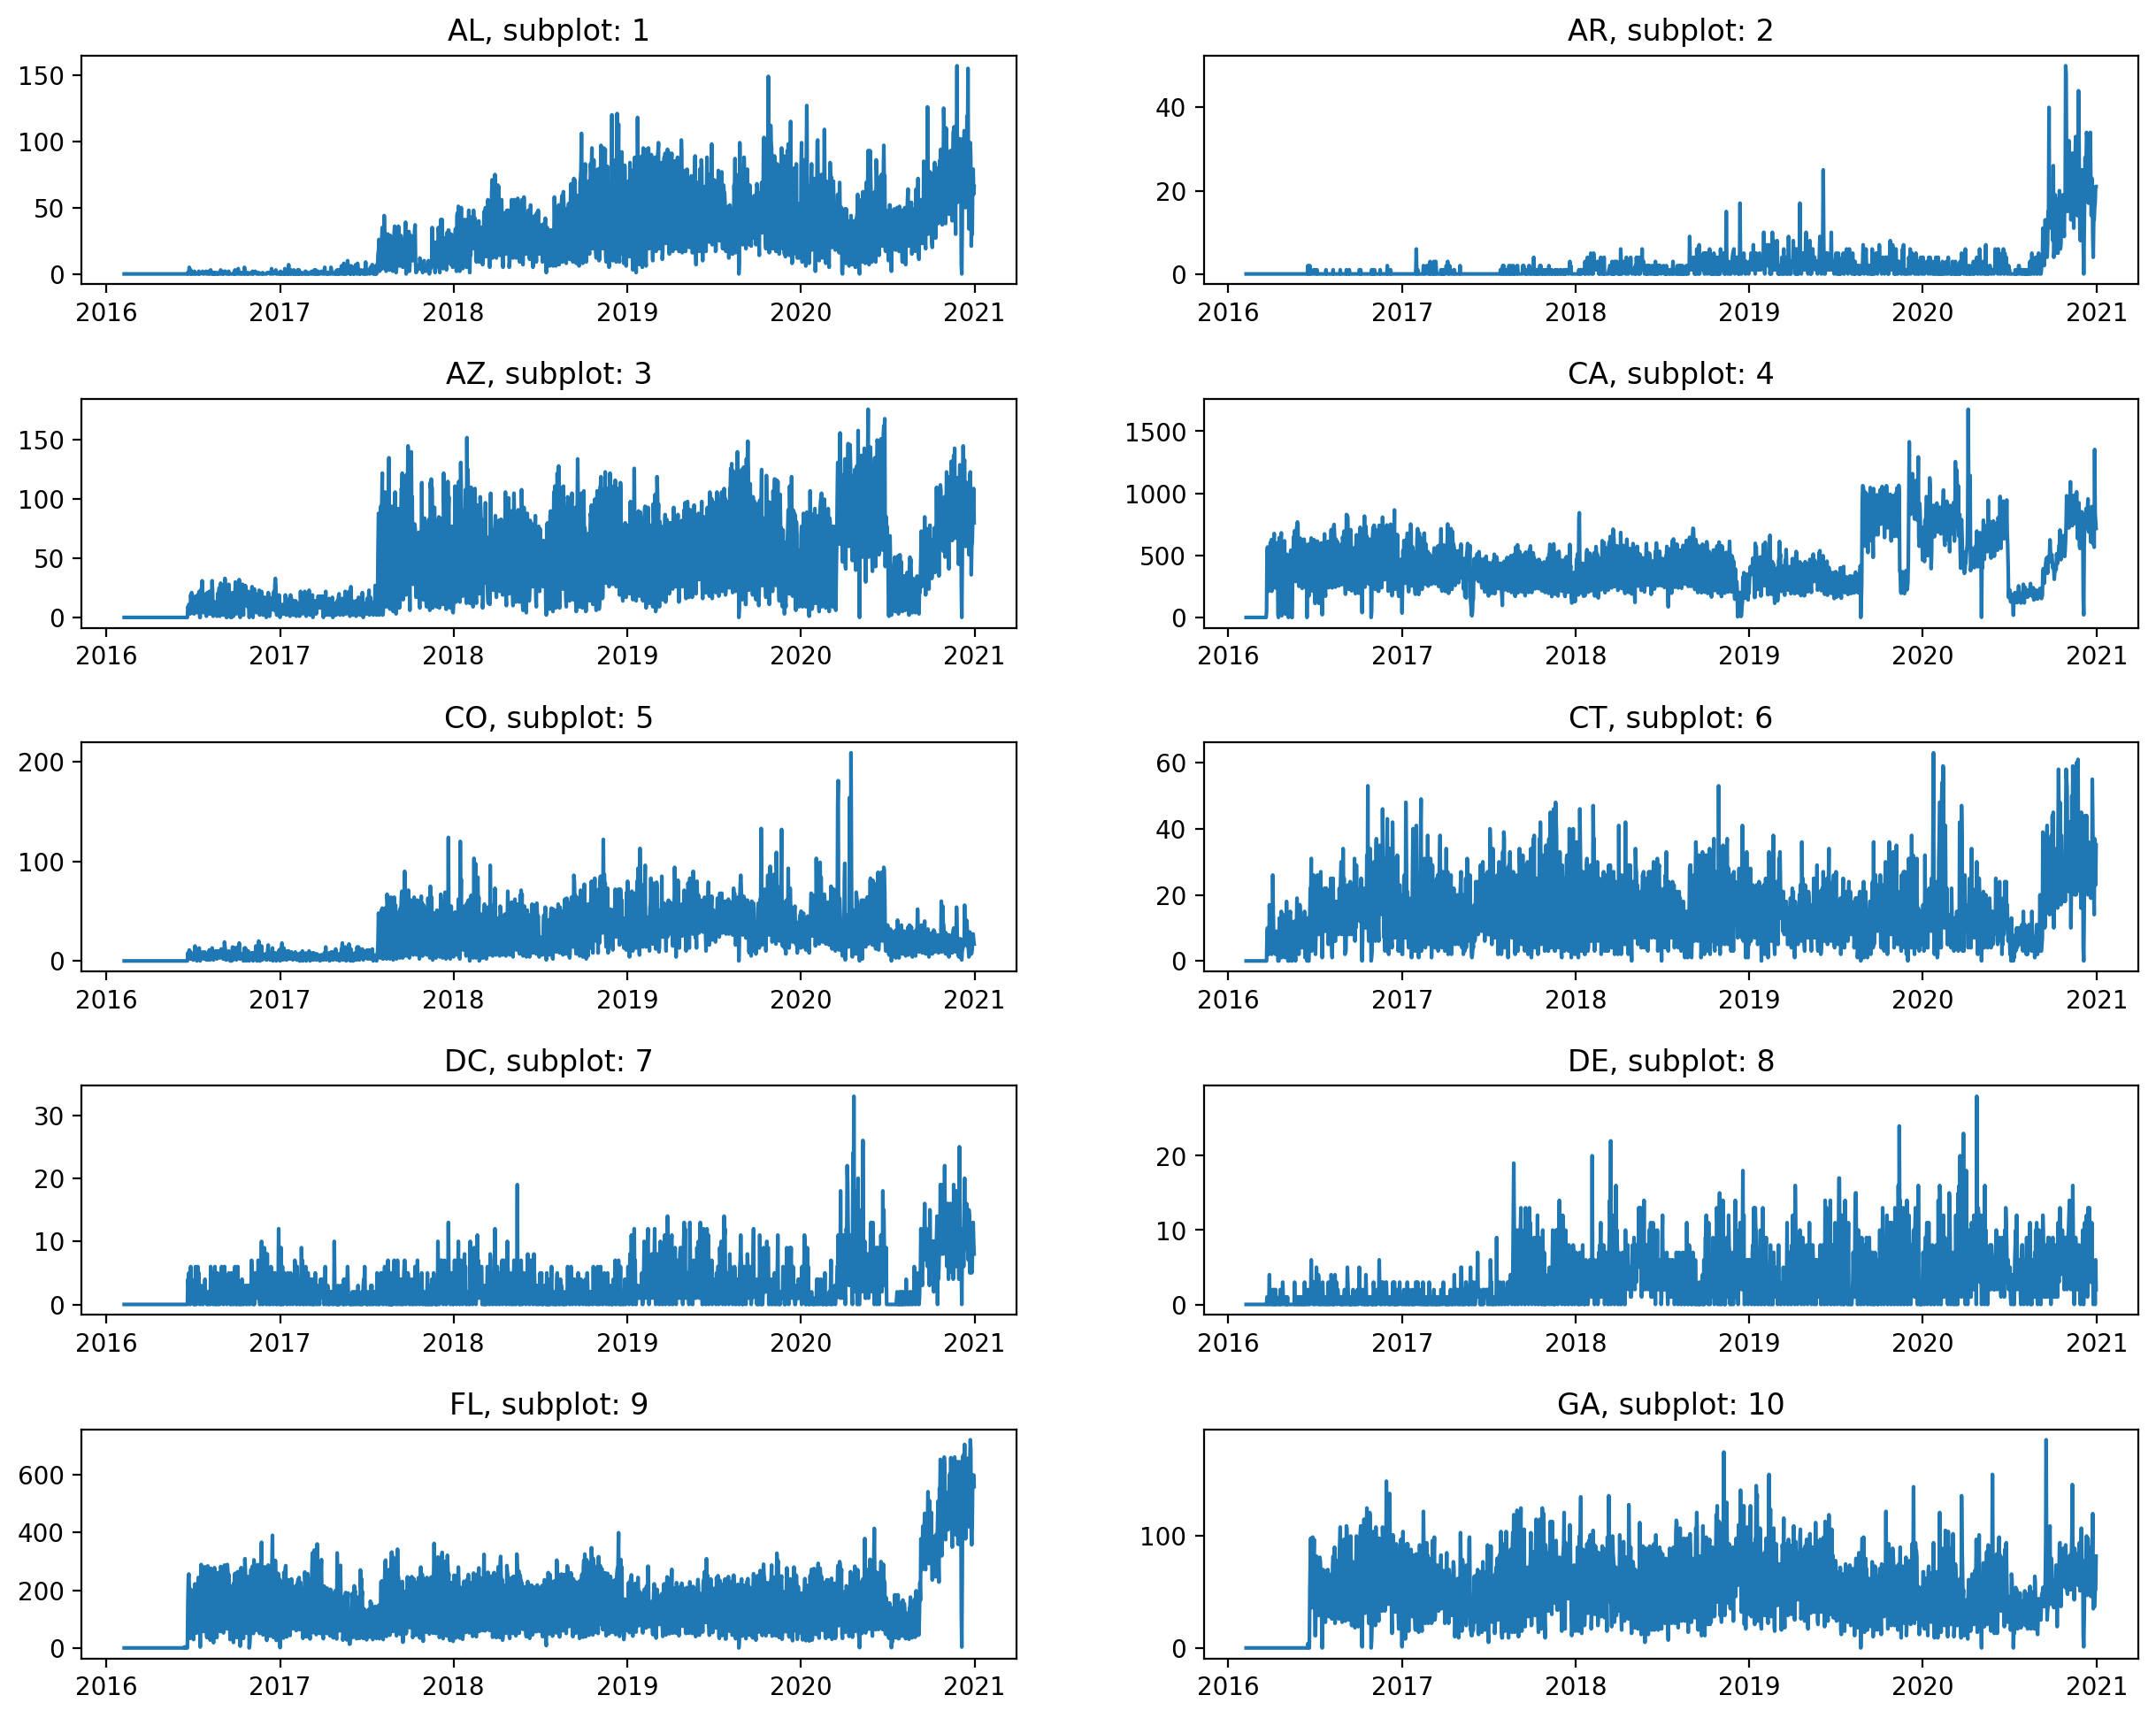

In [18]:
cols = ['AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA']

fig = plt.figure(figsize = (15, 12), dpi = 200)
c = 1

for i in cols:
    plt.subplot(5, 2, c)
    plt.title('{}, subplot: {}'.format(i, c))
    plt.plot(state[i])
    c += 1
    
fig.subplots_adjust(left=None,
    bottom=None,
    right=None,
    top=None,
    wspace=None,
    hspace=0.5,)    
plt.savefig("figures/first_plot.jpg")
plt.show()

Because of what I see in the graphs of Alabama and Arizona I feel that it is best to utilize the data beginning from 2018.  This is because prior to 2018, there seems to be some amount of missing data for some of the states and beginning in Jan 01, 2018 would still allow me to use 3 years worth of data to predict the following 3 to 4 months.  Now it is time to transform the data.

In [19]:
state = state.loc['2018-01-01':,:]

In [20]:
state.head()

State,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,8,0,12,221,4,7,0,1,57,27,...,0,17,51,10,17,0,14,7,0,0
2018-01-02,21,0,77,322,39,35,3,7,252,63,...,1,48,269,17,74,0,40,17,1,0
2018-01-03,19,0,66,467,41,36,7,3,184,73,...,0,67,282,25,97,1,42,21,0,0
2018-01-04,29,0,111,444,49,24,3,4,189,57,...,0,66,273,20,143,0,41,34,3,0
2018-01-05,34,0,77,511,35,26,2,5,198,90,...,0,118,280,20,96,2,68,24,0,0


In [21]:
state.tail()

State,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-27,30,13,63,565,12,14,6,2,422,37,...,0,35,207,18,131,0,21,14,11,0
2020-12-28,72,16,80,1353,27,37,11,3,592,37,...,0,131,297,82,150,2,47,17,6,0
2020-12-29,79,17,97,840,27,36,13,0,556,51,...,0,105,327,93,151,0,40,9,12,0
2020-12-30,60,21,109,781,21,23,10,6,599,52,...,1,132,529,42,167,0,60,24,6,0
2020-12-31,66,21,80,717,17,35,8,2,559,82,...,0,164,587,83,159,3,20,4,5,0


Now I will make the same plot to see the difference.

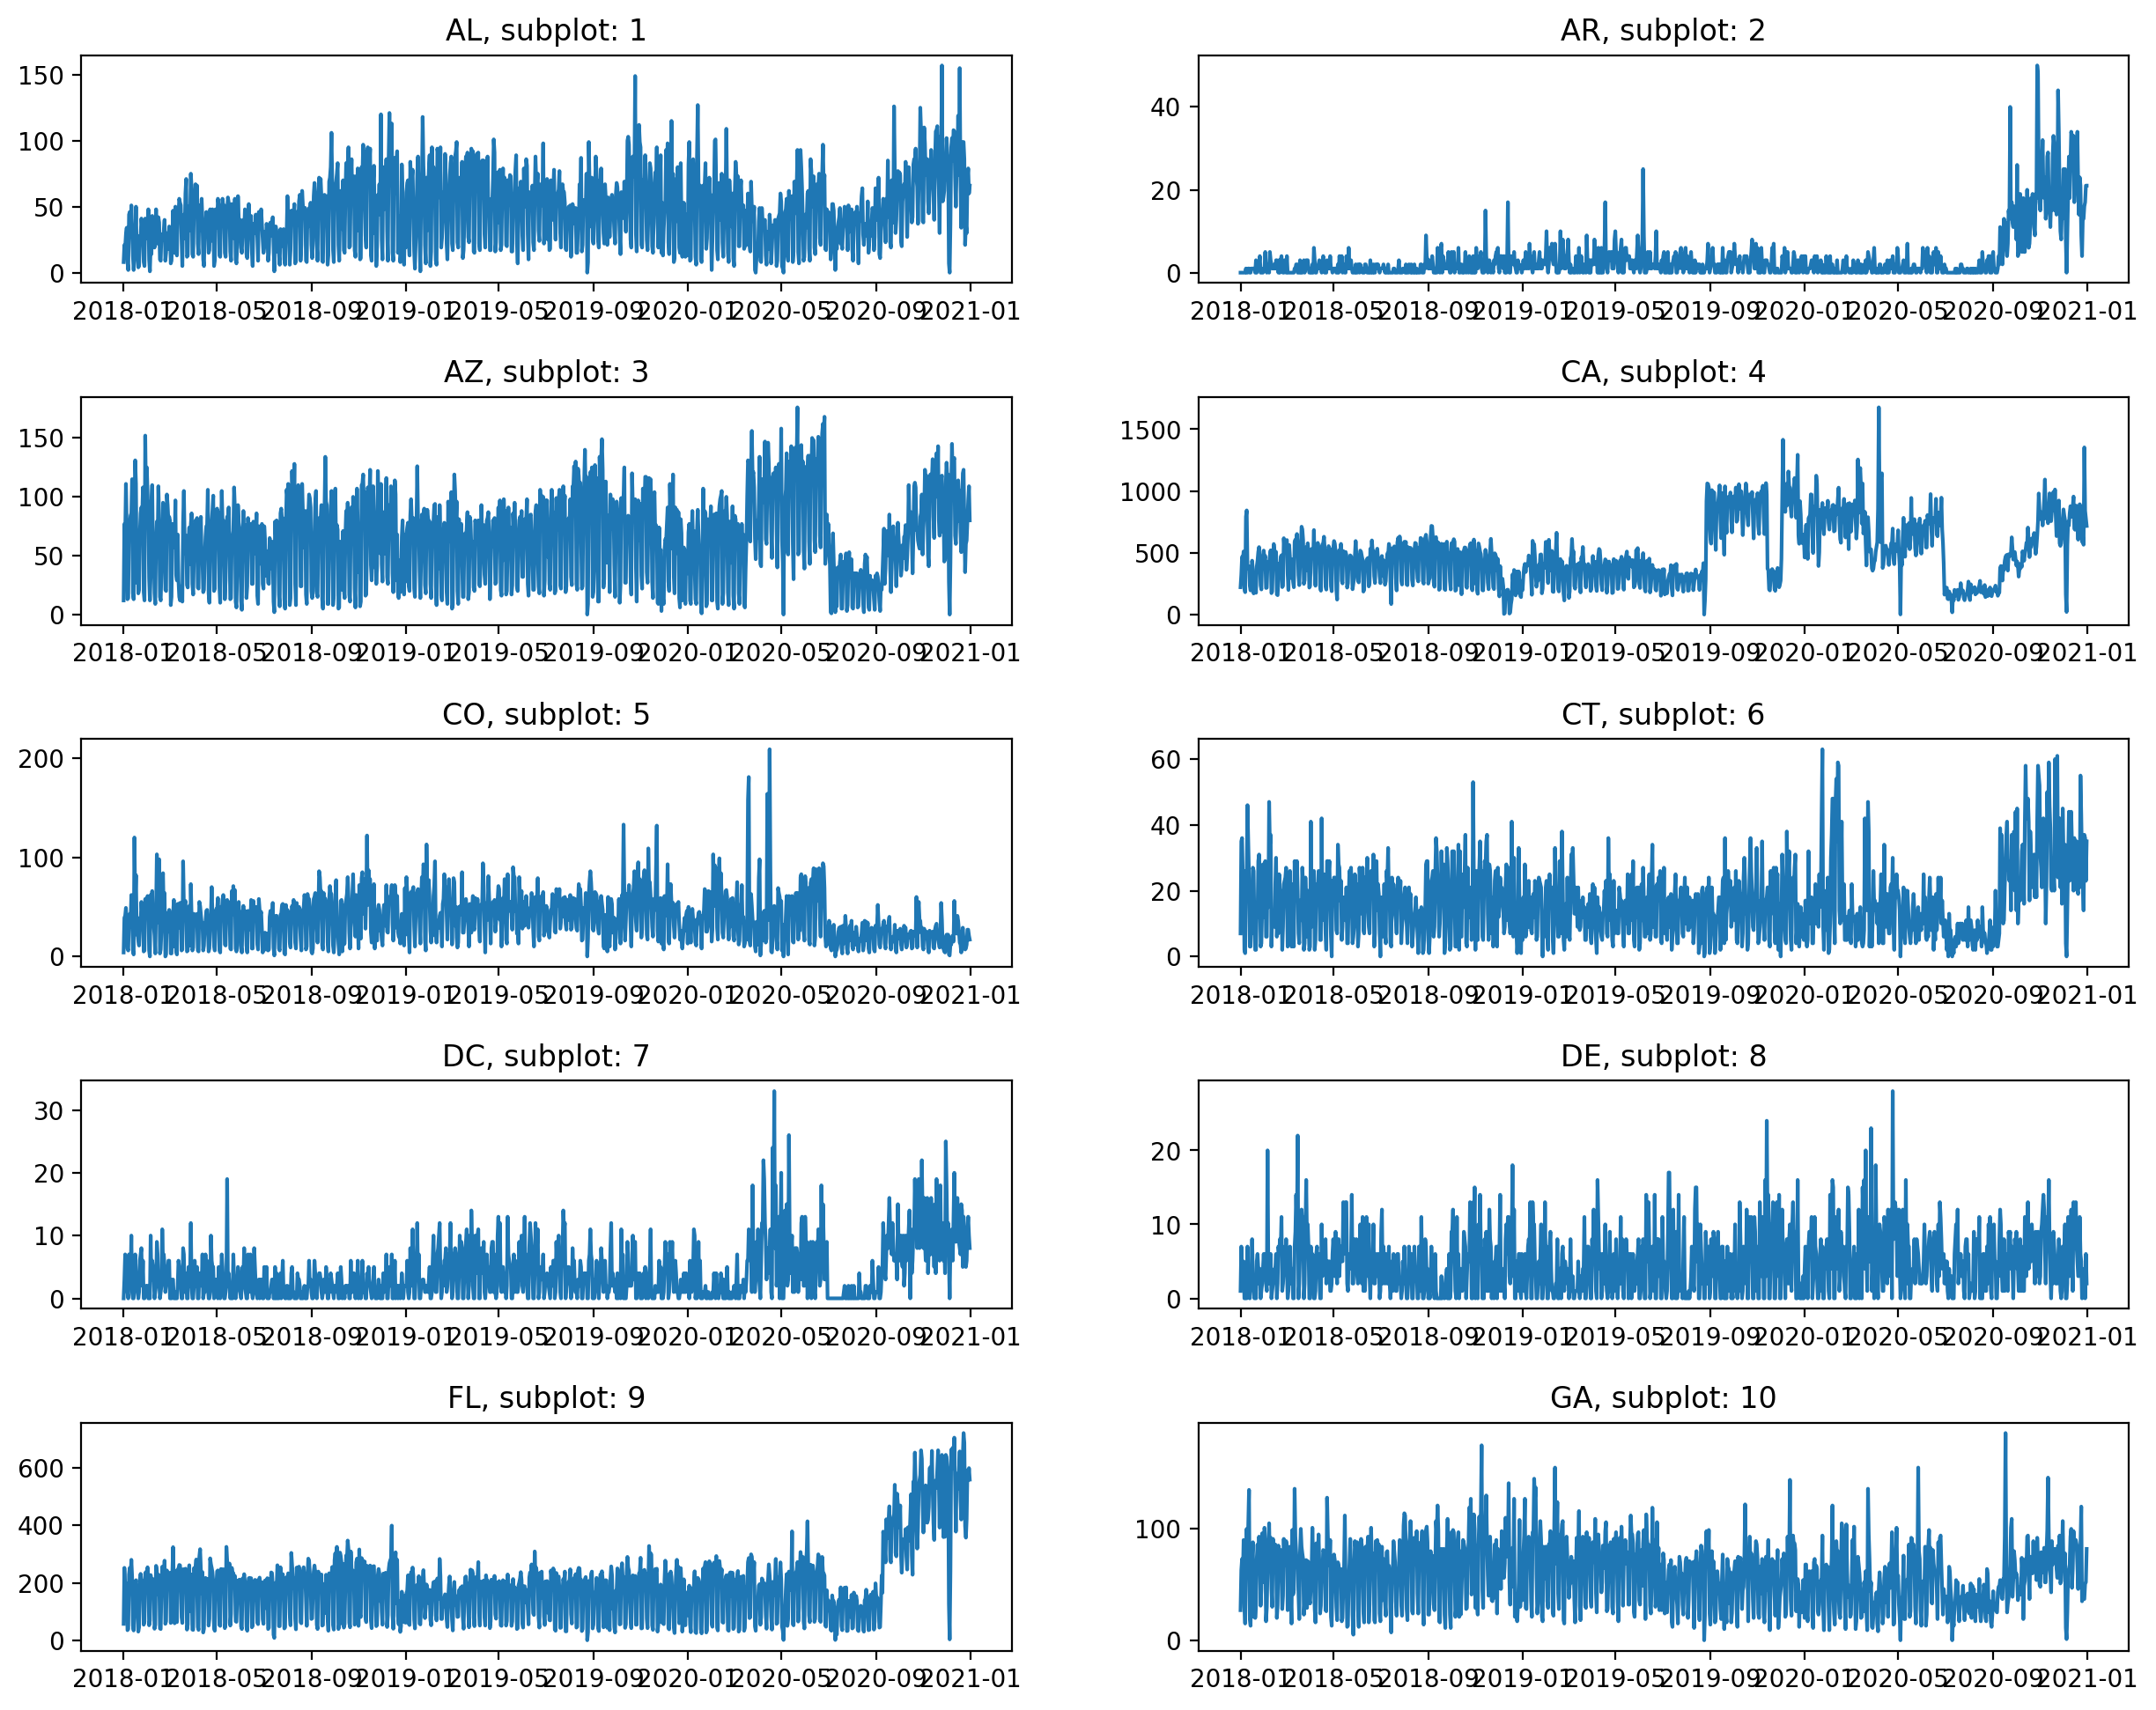

In [22]:
fig = plt.figure(figsize = (15, 12), dpi = 200)
c = 1

for i in cols:
    plt.subplot(5, 2, c)
    plt.title('{}, subplot: {}'.format(i, c))
    plt.plot(state[i])
    c += 1
    
fig.subplots_adjust(left=None,
    bottom=None,
    right=None,
    top=None,
    wspace=None,
    hspace=0.5,)

plt.savefig("figures/first_plot_2.jpg", bbox_inches = 'tight')
plt.show()

The plots with the index reset seems to have a more stable information.

Since my goal is to predict the first quarter of 2021, I will analyze the data by quarter.

In [23]:
quarterly = state.resample(rule = 'Q').sum()

In [24]:
quarterly

State,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-31,2547,100,5407,36823,3275,1516,279,411,15031,5696,...,5,5668,21170,2126,5804,61,4186,1242,118,36
2018-06-30,3099,111,5149,38621,3113,1588,247,448,15858,5375,...,0,6027,20059,1924,5164,30,5086,1118,150,29
2018-09-30,3262,109,5725,41597,3302,1367,159,256,15531,5768,...,2,6021,19147,1939,6268,33,4577,891,112,23
2018-12-31,5036,211,5838,31753,3940,1620,173,465,17014,6506,...,6,6479,22002,4262,8925,63,4133,1482,260,39
2019-03-31,4892,230,5318,33174,4181,1290,371,299,13517,6252,...,11,5243,17874,5356,6937,56,3563,2087,134,53
2019-06-30,4924,298,5550,32261,4338,1269,434,391,14765,6145,...,10,5733,18274,4773,6344,20,3148,1366,134,14
2019-09-30,4274,173,7076,45945,3965,1220,341,378,14365,4633,...,5,4593,19571,5011,5617,75,3489,1545,112,15
2019-12-31,4986,194,5875,71183,4309,1434,263,498,15293,5078,...,0,5247,19752,5418,5989,71,3372,1587,61,17
2020-03-31,4283,115,5661,69246,3928,1571,227,517,15404,4600,...,1,4730,15822,4736,5399,70,3069,1096,61,7


In [25]:
quarterly = quarterly.T

In [26]:
quarterly.head()

Date,2018-03-31,2018-06-30,2018-09-30,2018-12-31,2019-03-31,2019-06-30,2019-09-30,2019-12-31,2020-03-31,2020-06-30,2020-09-30,2020-12-31
State,,,,,,,,,,,,
AL,2547,3099,3262,5036,4892,4924,4274,4986,4283,3647,3681,6648
AR,100,111,109,211,230,298,173,194,115,132,308,1710
AZ,5407,5149,5725,5838,5318,5550,7076,5875,5661,9346,3165,7764
CA,36823,38621,41597,31753,33174,32261,45945,71183,69246,58265,22168,64225
CO,3275,3113,3302,3940,4181,4338,3965,4309,3928,4367,1910,1909


In [27]:
first_quarters = quarterly.iloc[:,[0, 4, 8]]
first_quarters.columns = ['2018_q1', '2019_q1', '2020_q1']

In [28]:
first_quarters['percent_change_2019'] = 100 * (first_quarters['2019_q1'] - first_quarters['2018_q1']) / first_quarters['2018_q1']
first_quarters['percent_change_2020'] = 100 * (first_quarters['2020_q1'] - first_quarters['2019_q1']) / first_quarters['2019_q1']

In [29]:
first_quarters.reset_index(inplace = True)

I will use the geopandas library to better analyze the data geographically.  In order to accomplish that I will use the geospatial data found in the [census.gov](https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html) website.  But first let me import the necessary library.

In [30]:
import geopandas as gpd

Now I will upload the file with the geospatial geometry data.

In [31]:
us = gpd.read_file("cb_2018_us_state_20m/cb_2018_us_state_20m.shp")

In [32]:
us.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827..."
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ..."
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987..."


In order to be able to merge, I will change the 'STUSPS' columns name of the 'us' dataframe to 'State' as it is in the state dataframe.

In [33]:
us.rename(columns = {'STUSPS':'State'}, inplace = True) # Renaming the columns

now I will merge the 'us' data frame to the 'first_quarters' dataframe.

In [34]:
first_quarters = first_quarters.merge(us[['State', 'geometry']])
first_quarters = gpd.GeoDataFrame(first_quarters)

Now I will check the percent changes during the first quarters fot 2019 and 2020.  The percent change will be calculated as fallows:


>$C = (\frac{x_2 - x_1}{x_1})*100\$

>Where:\
>$C$ = Percent Change\
>$x_1$ = previous year first quarterly total\
>$x_2$ = current year first quarterly total

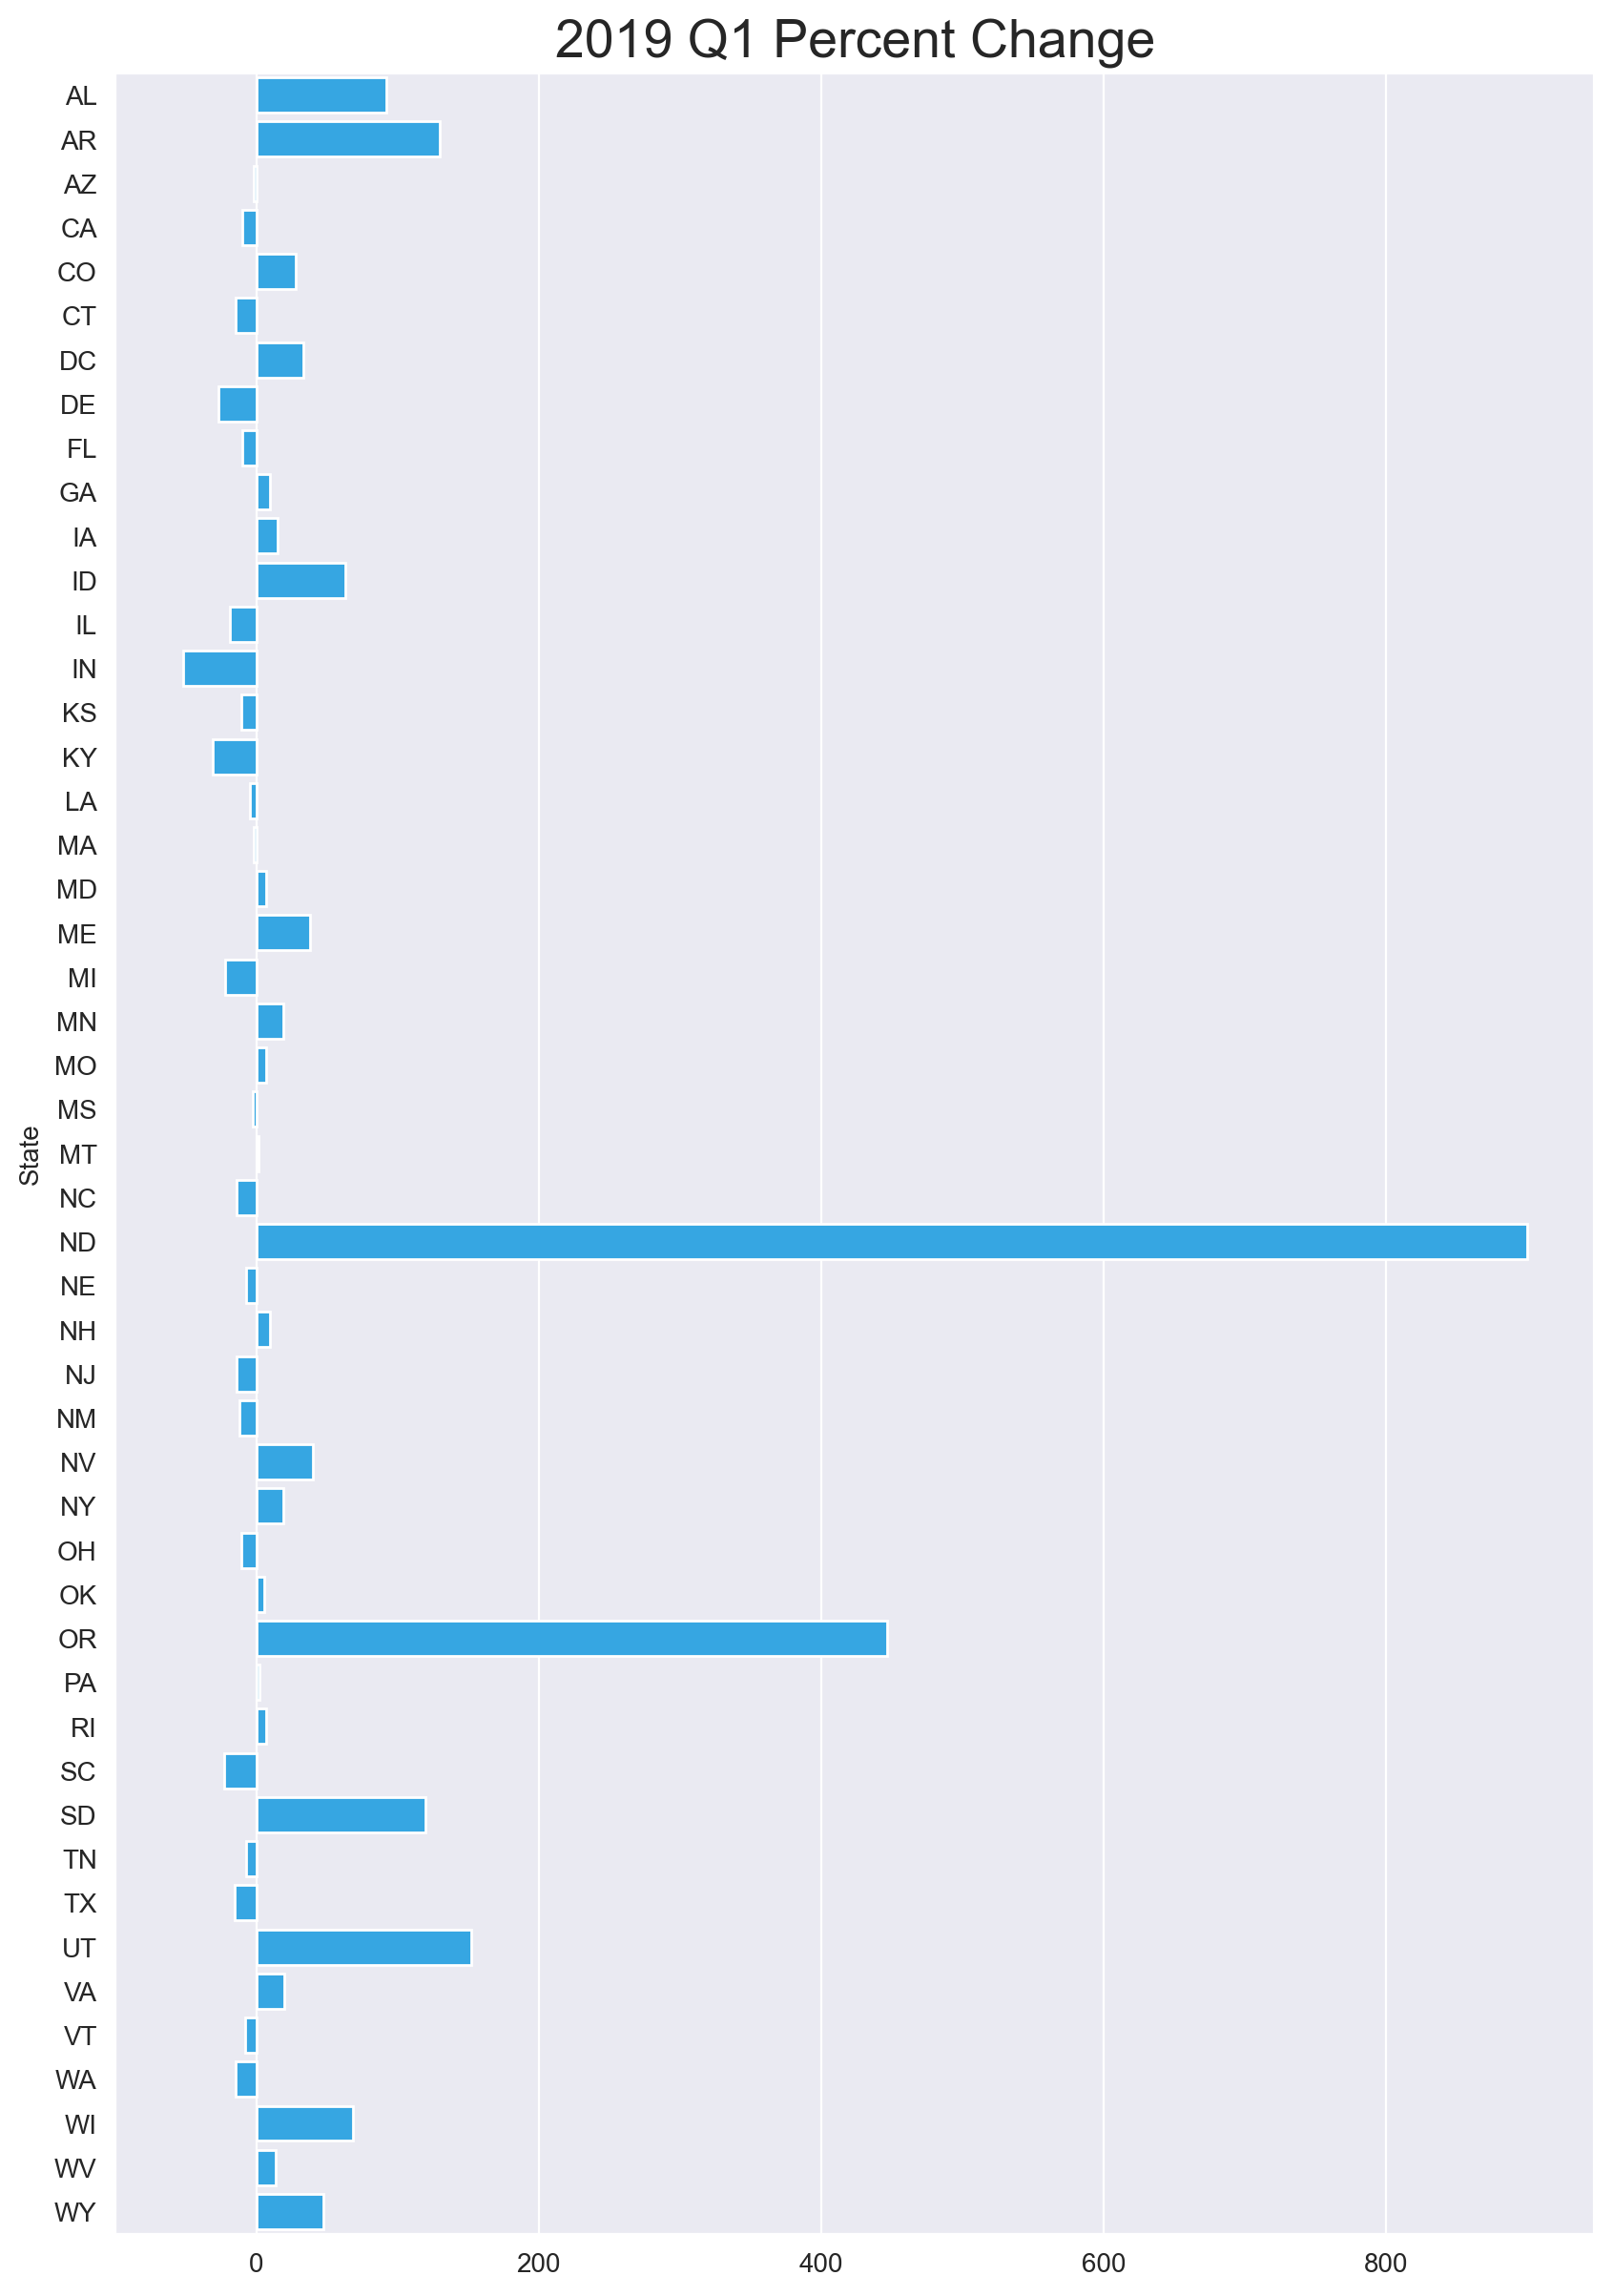

In [35]:
plt.figure(figsize = (10, 15), dpi = 200)

sns.set_style('darkgrid')
sns.barplot(x = 'percent_change_2019', y = 'State', data = first_quarters, color = '#19AEFF')

plt.title('2019 Q1 Percent Change', size = 20)
plt.xlabel(None)


plt.savefig("figures/percent_change_2019.jpg", bbox_inches = 'tight')
plt.show()

The percent change from the year 2019 shows some great change in some states such as North Dakota and Oregon.  For the most part the data seems to show some balance between a net gain and loss in the number of accidents for the first quarter of 2019.  I will now check and see how it looks geographically.

In [36]:
# This code will take a specific set of coordinates (latitude and longitude) within the geography of each state.
# This coordinates will later be used to label each state in the map graph.

first_quarters['coords'] = first_quarters['geometry'].apply(lambda x: x.representative_point().coords[:])
first_quarters['coords'] = [coords[0] for coords in first_quarters['coords']]

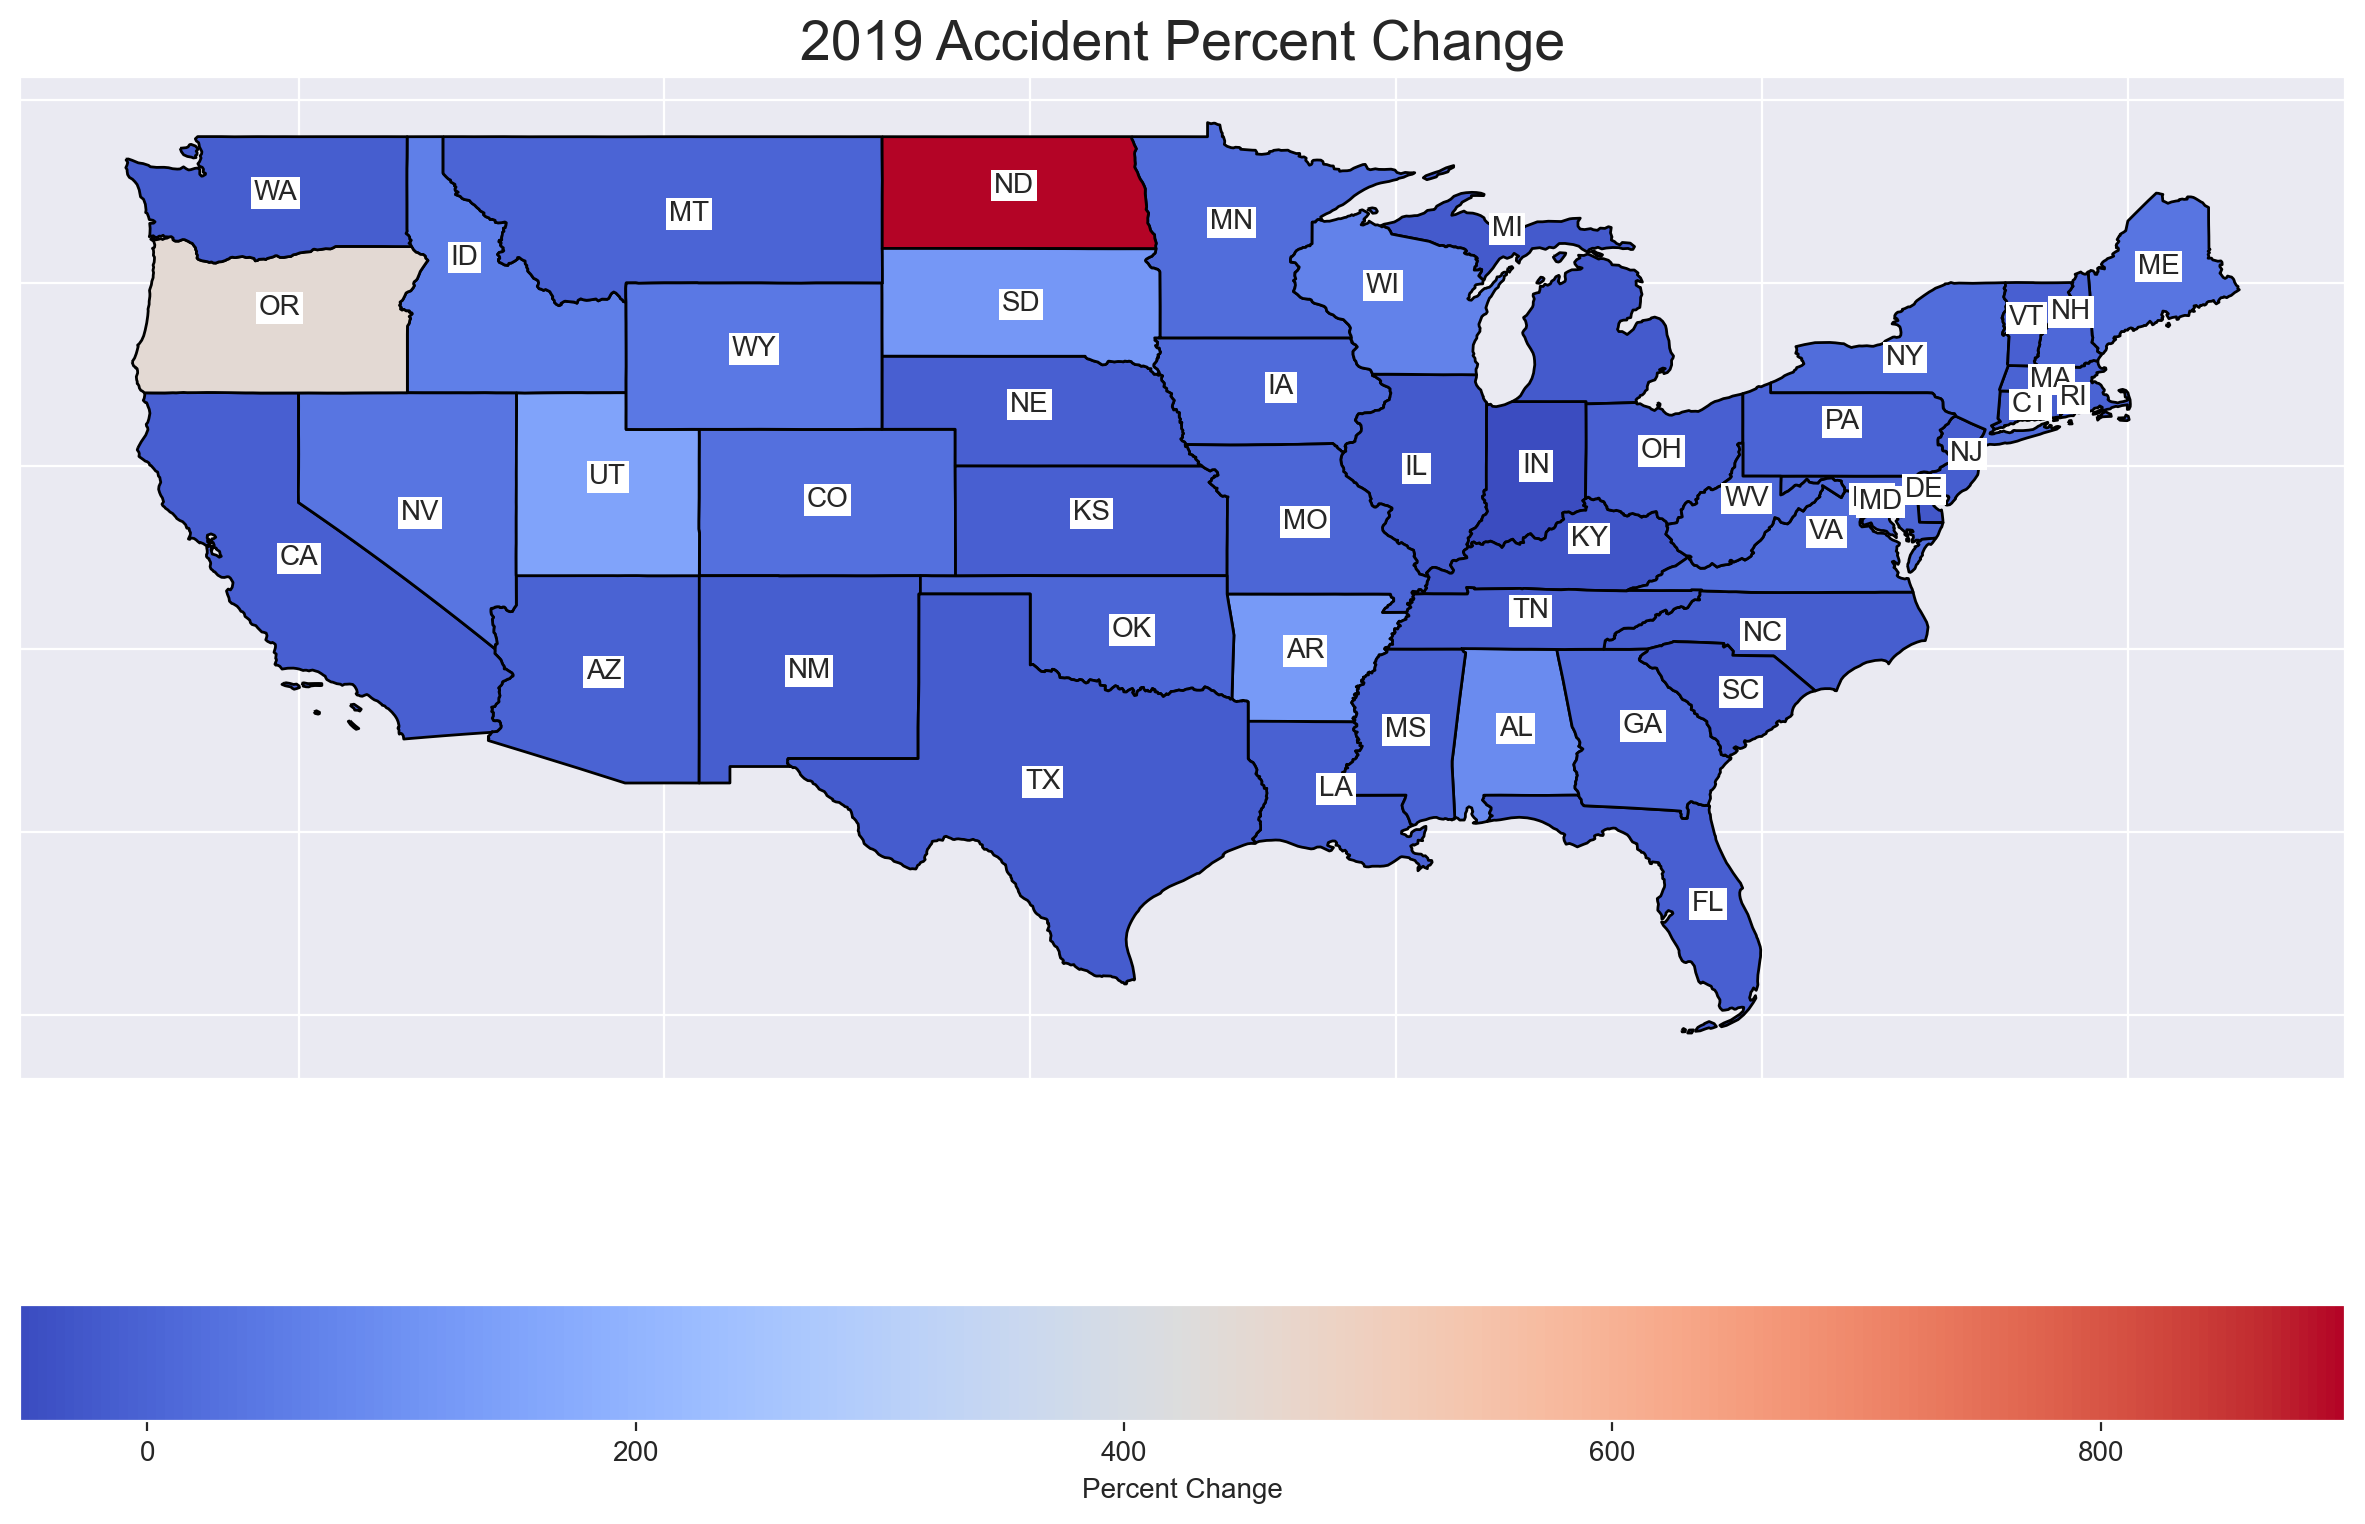

In [37]:
# Creating the map graph for the percent change in the year 2019

fig, ax = plt.subplots(figsize = (15, 10), dpi = 200)
first_quarters.plot('percent_change_2019', cmap = 'coolwarm', edgecolor = 'k', legend = True,
                    legend_kwds = {'orientation':'horizontal',
                                  'label':'Percent Change'}, ax = ax)
plt.title("2019 Accident Percent Change", size = 20)

ax.tick_params(left = False, labelleft = False, bottom = False, labelbottom = False)

for idx, row in first_quarters.iterrows():
    plt.annotate(s=row['State'], xy=row['coords'],
                 horizontalalignment='center', 
                 bbox=dict(boxstyle='square,pad=0.1', 
                           fc='white', ec='none'))

    
plt.savefig("figures/2020_percent_change.jpg", bbox_inches = 'tight')
plt.show()

The map graph illustrates that the states of North Dakota and Oregon are the only outliers of the dataset.  The remaining states seems to have a light positive or negative percent change.

Now I will check the percente change for the year 2020.

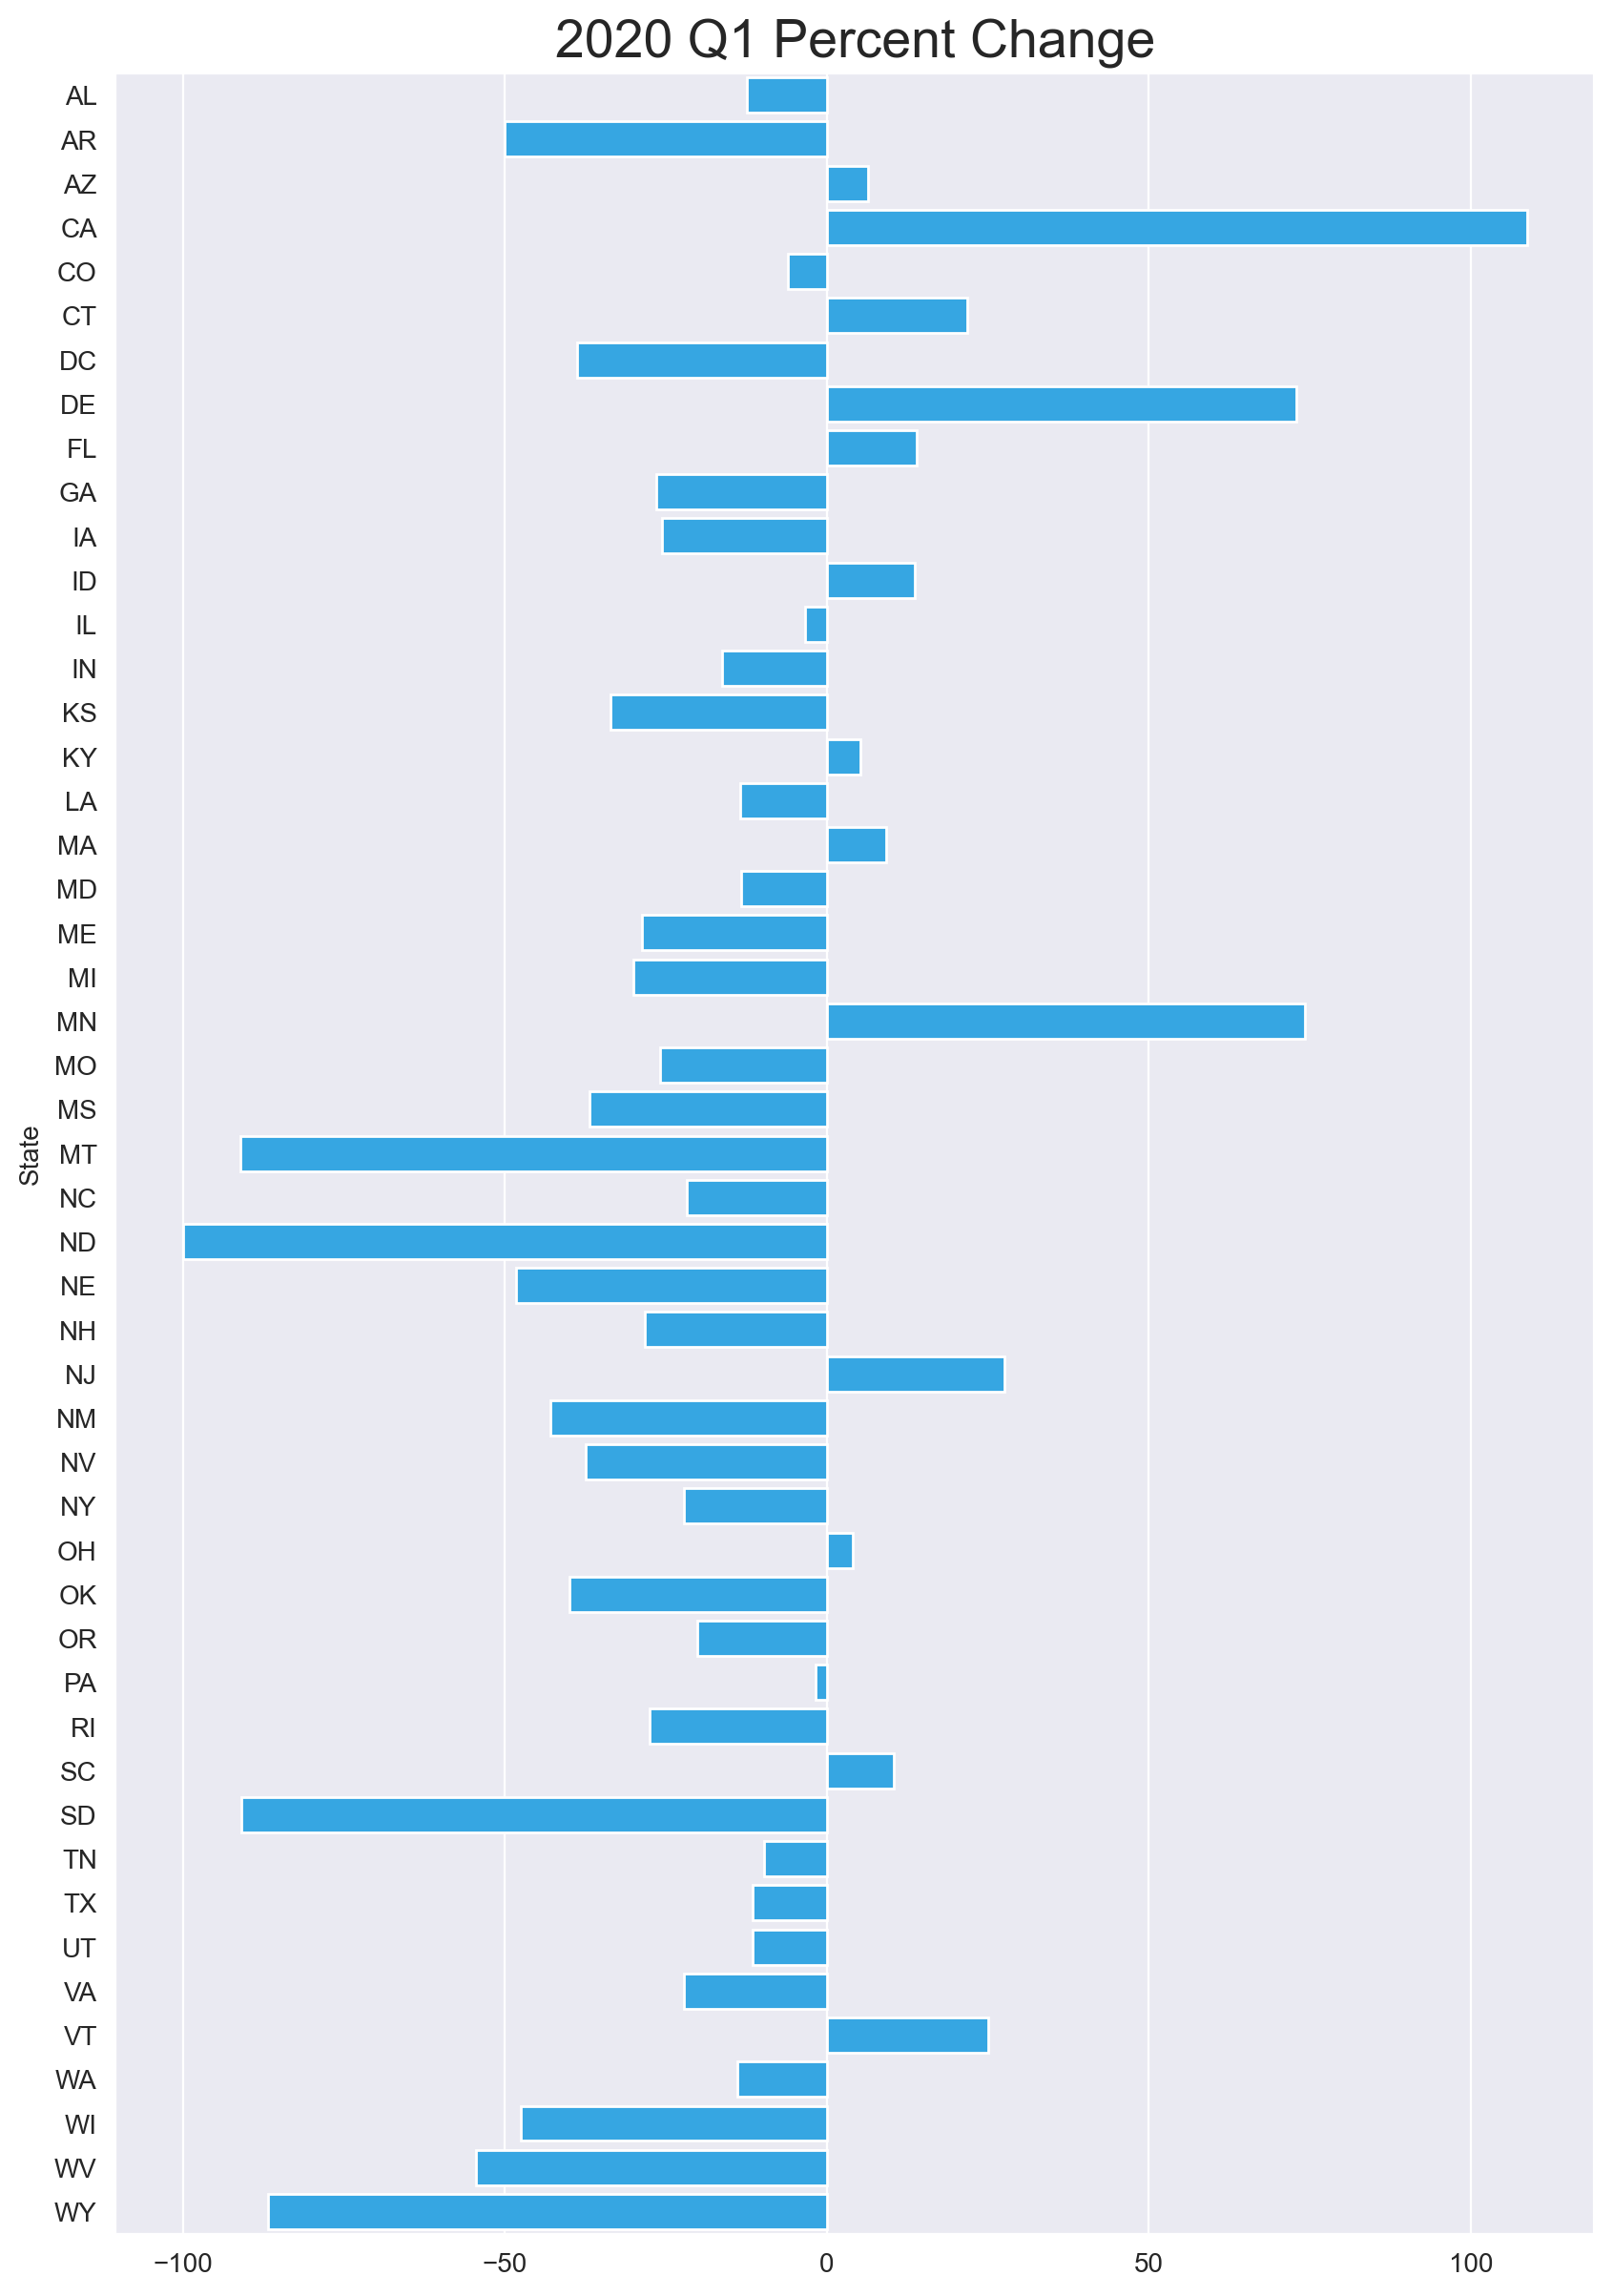

In [38]:
plt.figure(figsize = (10, 15), dpi = 200)

sns.set_style('darkgrid')
sns.barplot(x = 'percent_change_2020', y = 'State', data = first_quarters, color = '#19AEFF')

plt.title('2020 Q1 Percent Change', size = 20)
plt.xlabel(None)

plt.savefig("figures/percent_change_2020.jpg", bbox_inches = 'tight')
plt.show()

The year 2020 shows that most states had a negative percent change.  That means that most states had a decrease in the number of accidents in the first quarter of 2020.  One reason could be because of the covid-19 pandemic and the measures taken to deal with it, but the World Health Organization did not declare it to be a global pandemic until March 11 of that year ([click here](https://www.ajmc.com/view/a-timeline-of-covid19-developments-in-2020)).  That means that the restrictions due to the pandemic may not have had as big of an affect in the number of accidents in the first quarter of 2020.

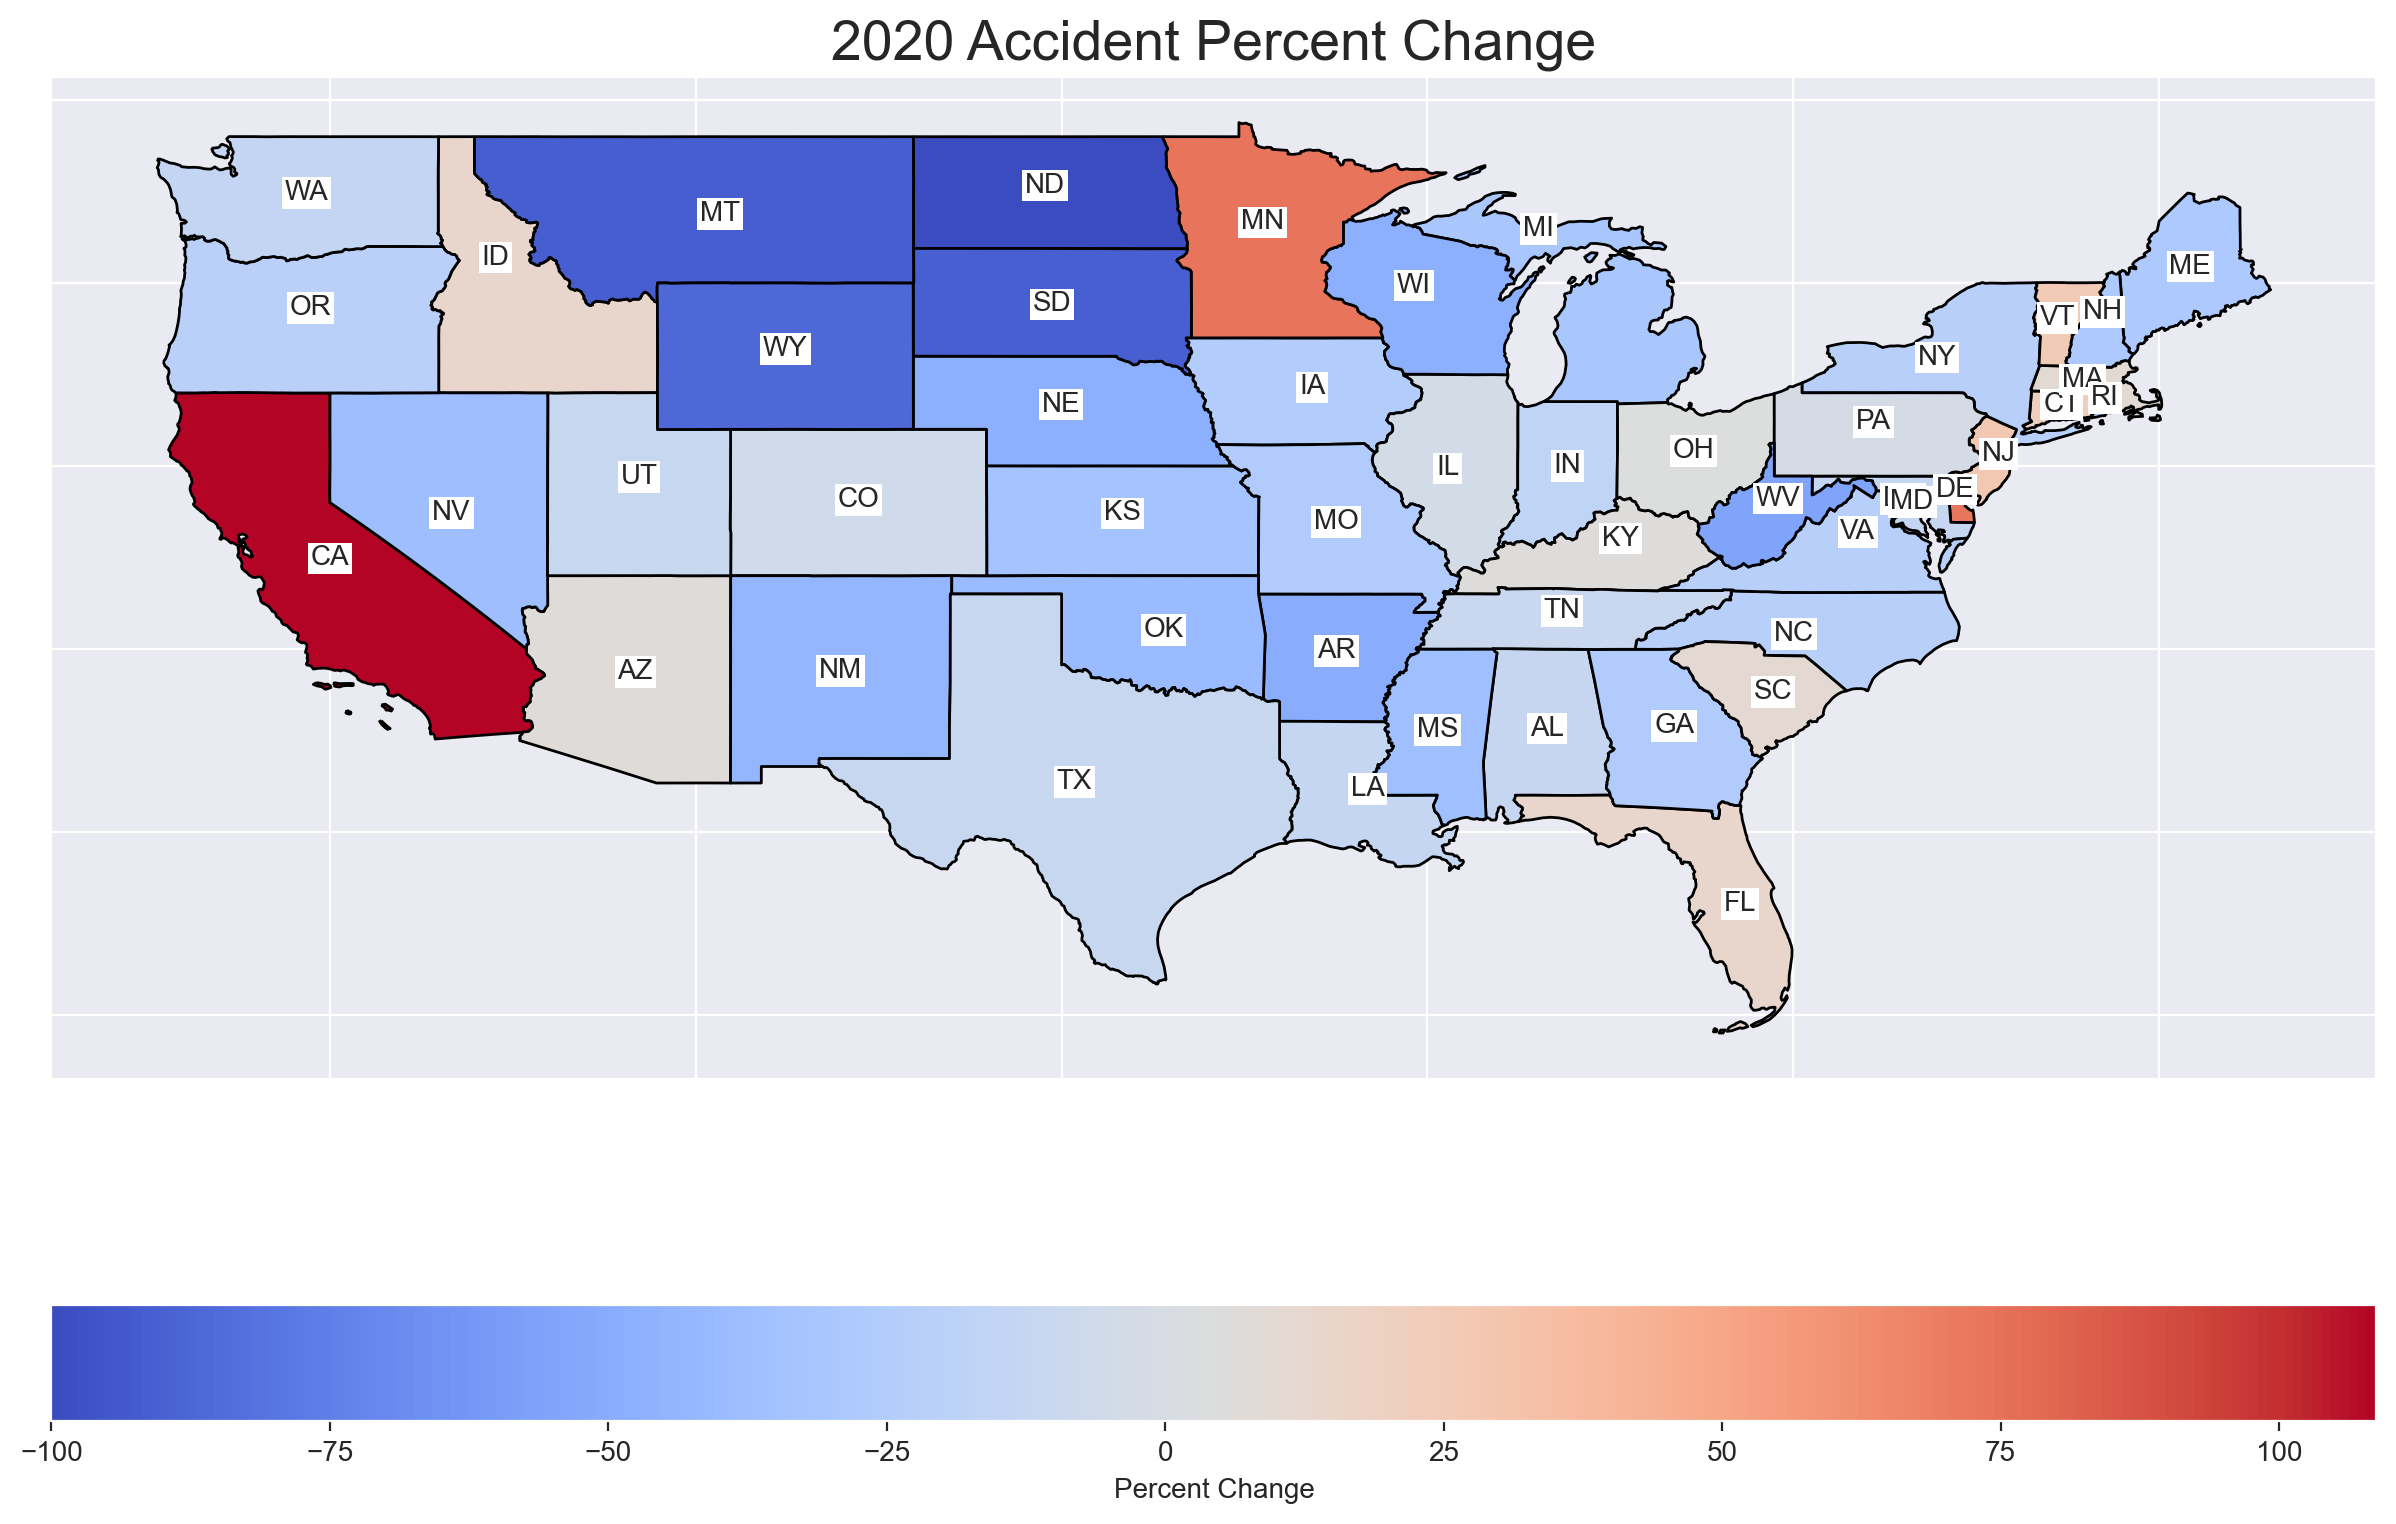

In [39]:
fig, ax = plt.subplots(figsize = (15, 10), dpi = 200)
first_quarters.plot('percent_change_2020', cmap = 'coolwarm', edgecolor = 'k', legend = True,
                    legend_kwds = {'orientation':'horizontal',
                                  'label':'Percent Change'}, ax = ax)
plt.title("2020 Accident Percent Change", size = 20)

ax.tick_params(left = False, labelleft = False, bottom = False, labelbottom = False)

for idx, row in first_quarters.iterrows():
    plt.annotate(s=row['State'], xy=row['coords'],
                 horizontalalignment='center', bbox=dict(boxstyle='square,pad=0.1', fc='white', ec='none'))

plt.savefig("figures/2020_percent_change.jpg", bbox_inches = 'tight')
plt.show()

There are more extreme negatives and positives in the 2020 map.  The main difference though is that not the max does not seem to be above 100%.  Some states do seem to have hit, or come very close to, a 100% decrease in accidents for 2020 compared to 2019.

I will now save the dataframes created to utilize them in the machine learning part of the project.

In [40]:
df.to_csv('df.csv')
state.to_csv('state.csv')
first_quarters.to_csv('first_quarters.csv')

This is the end of the data wrangling and exploratory data analysis.